In [ ]:
#Importing the required library
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
#Loading the Dataset
labels = ['rice', 'maize']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Now we can easily fetch our train and split it into traing and validation data.
train = get_data('/content/drive/MyDrive/Osun, Nigeria Chapter/01- Improving Food Security and Crop Yield in Nigeria through Machine Learning/Offical Project Folder/Data/Crop Classification/train')

train, val = train_test_split(train, test_size=0.20, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


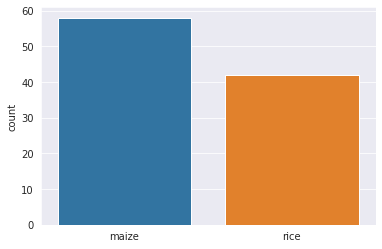

In [ ]:
#Data Visualization
l = []
for i in train:
    if(i[1] == 0):
        l.append("rice")
    else:
        l.append("maize")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'maize')

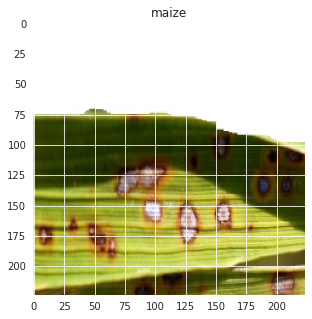

In [ ]:
#Random image from rice
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'maize')

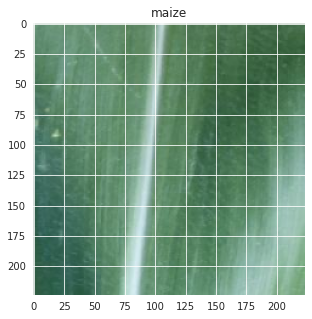

In [ ]:
#Random image from maize
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

Data Preprocessing and Data Augmentation

In [ ]:
#Data Preprocessing
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
#Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

Model





In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


4/4 [==============================] - 8s 2s/step - loss: 0.7065 - accuracy: 0.4500 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 2/500
4/4 [==============================] - 7s 2s/step - loss: 0.7003 - accuracy: 0.4400 - val_loss: 0.6824 - val_accuracy: 0.6538
Epoch 3/500
4/4 [==============================] - 7s 2s/step - loss: 0.6927 - accuracy: 0.5400 - val_loss: 0.6815 - val_accuracy: 0.6923
Epoch 4/500
4/4 [==============================] - 7s 2s/step - loss: 0.6934 - accuracy: 0.4900 - val_loss: 0.6807 - val_accuracy: 0.6923
Epoch 5/500
4/4 [==============================] - 7s 2s/step - loss: 0.6867 - accuracy: 0.5900 - val_loss: 0.6801 - val_accuracy: 0.6154
Epoch 6/500
4/4 [==============================] - 7s 2s/step - loss: 0.6864 - accuracy: 0.5500 - val_loss: 0.6797 - val_accuracy: 0.5769
Epoch 7/500
4/4 [==============================] - 7s 2s/step - loss: 0.6839 - accuracy: 0.6300 - val_loss: 0.6789 - val_accuracy: 0.5769
Epoch 8/500
4/4 [=============================

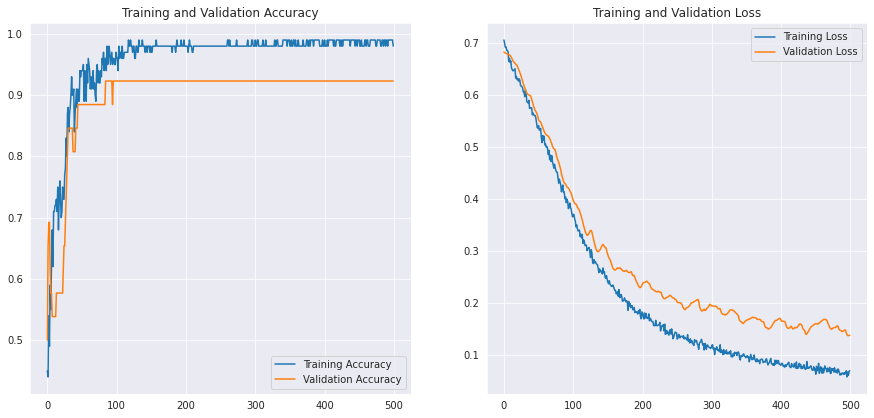

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(x_val)
predictions = np.argmax(predictions,axis=1)

print(classification_report(y_val, predictions, target_names = ['rice (Class 0)','maize (Class 1)']))

                 precision    recall  f1-score   support

 rice (Class 0)       1.00      0.86      0.92        14
maize (Class 1)       0.86      1.00      0.92        12

       accuracy                           0.92        26
      macro avg       0.93      0.93      0.92        26
   weighted avg       0.93      0.92      0.92        26



In [ ]:
model.save('/content/drive/MyDrive/Osun, Nigeria Chapter/01- Improving Food Security and Crop Yield in Nigeria through Machine Learning/Offical Project Folder/Data/Crop Classification/crop_classification.h5')